Taille 6: 0.00 secondes
Taille 7: 0.01 secondes
Taille 8: 0.05 secondes
Taille 9: 0.17 secondes
Taille 10: 1.21 secondes
Taille 11: 13.43 secondes


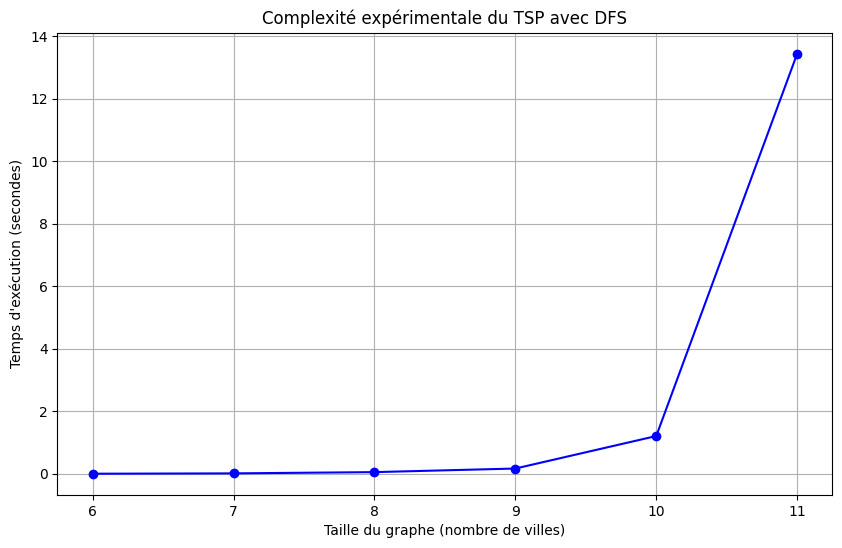

In [18]:
import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint

def tsp_dfs(graph, start): 
    n = len(graph)
    visited = [False] * n
    min_cost = float('inf')
    best_path = []

    def dfs(city, count, cost, path):
        nonlocal min_cost, best_path
        if count == n and graph[city][start] > 0:
            total_cost = cost + graph[city][start]
            if total_cost < min_cost:
                min_cost = total_cost
                best_path = path + [start]
            return

        for next_city in range(n):
            if not visited[next_city] and graph[city][next_city] > 0:
                visited[next_city] = True
                dfs(next_city, count + 1, cost + graph[city][next_city], path + [next_city])
                visited[next_city] = False

    visited[start] = True
    dfs(start, 1, 0, [start])
    return min_cost, best_path

def generate_random_graph(size):
    #Génère une matrice aléatoire de distances pour le TSP
    graph = np.zeros((size, size))
    for i in range(size):
        for j in range(i + 1, size):
            distance = randint(1, 30)  
            graph[i][j] = distance
            graph[j][i] = distance 
    return graph.tolist()

def measure_execution_time(sizes):
    #Mesure le temps d'exécution pour différentes tailles
    times = []
    for size in sizes:
        # Générer un graphe de taille 'size'
        graph = generate_random_graph(size)
        
        # Mesurer le temps d'exécution
        start_time = time.time()
        tsp_dfs(graph, 0)  # Commence toujours de la ville 0
        end_time = time.time()
        
        execution_time = end_time - start_time
        times.append(execution_time)
        print(f"Taille {size}: {execution_time:.2f} secondes")
    
    return times

# Tailles à tester
sizes = [6,7,8,9,10,11]  

# Mesurer les temps d'exécution
execution_times = measure_execution_time(sizes)

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.plot(sizes, execution_times, 'bo-')
plt.xlabel('Taille du graphe (nombre de villes)')
plt.ylabel('Temps d\'exécution (secondes)')
plt.title('Complexité expérimentale du TSP avec DFS')
plt.grid(True)
plt.show() 